## Step 1: Data and Library Import

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import datetime

with open("vgsales.csv", "r") as f:
    df = pd.read_csv(f)

## Step 2: Dataset Examination

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Note
- There are some Null values in the Year and Publisher columns

- Year is a float, will need to change to int or datetime

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [6]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [8]:
df['Year'].nunique()

39

In [9]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### Note
- I'm not sure if PCFX refers to PC, will need to investigate that

- Will also need to investigate "Misc" genre for clarity

In [10]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Step 3: EDA and Feature Engineering

In [11]:
yearnan = df[df['Year'].isnull()].reset_index()
yearnan

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
1,377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
2,431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3,470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
4,607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
5,624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
6,649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
7,652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
8,711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
9,782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [12]:
pubnan = df[df['Publisher'].isnull()].reset_index()
pubnan

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1,1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
2,1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.00,Misc,NaN,0.87,0.32,0.00,0.02,1.21
3,2222,2224,Bentley's Hackpack,GBA,2005.00,Misc,NaN,0.67,0.25,0.00,0.02,0.93
4,3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.00,Misc,NaN,0.46,0.17,0.00,0.01,0.64
5,3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.00,Misc,NaN,0.46,0.17,0.00,0.01,0.64
6,3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.00,Misc,NaN,0.38,0.14,0.00,0.01,0.53
7,4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
8,4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.00,Misc,NaN,0.31,0.11,0.00,0.01,0.43
9,4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.00,Misc,NaN,0.30,0.11,0.00,0.01,0.42


### Null Values

#### There aren't that many observations with Null values so best to just drop them

In [13]:
df = df.dropna(how='any', axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df['Year'] = df['Year'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Data Types

#### Now that all the data types are correct, it's time to do some basic EDA

### Who were the Top 10 Publishers and how many games did they make?

In [17]:
df['Publisher'].value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [57]:
top_10_pubs = df.groupby(['Publisher'])['Publisher'].count().sort_values(ascending=False).head(10)
top_10_pubs

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

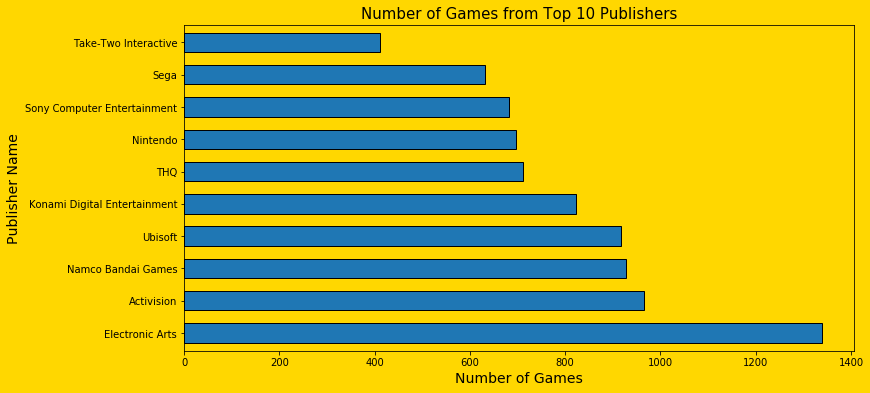

In [185]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_pubs.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Publisher Name', fontsize=14)
plt.title('Number of Games from Top 10 Publishers', fontsize=15)
plt.show()

### What were the top Genres?

In [20]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [21]:
df['Genre'].value_counts(normalize=True)

Action         0.20
Sports         0.14
Misc           0.10
Role-Playing   0.09
Shooter        0.08
Adventure      0.08
Racing         0.08
Platform       0.05
Simulation     0.05
Fighting       0.05
Strategy       0.04
Puzzle         0.03
Name: Genre, dtype: float64

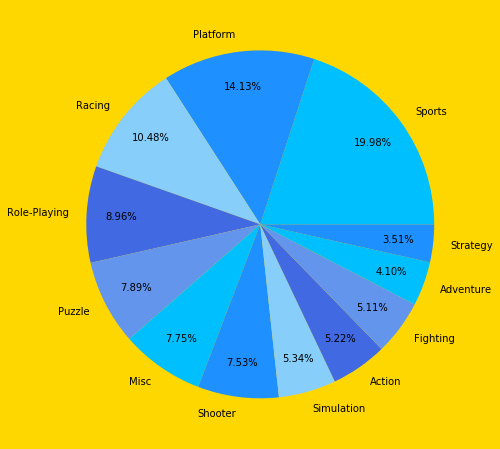

In [155]:
plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].unique(), colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.show()

In [162]:
top_genres = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False).head(10)
top_genres

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: Genre, dtype: int64

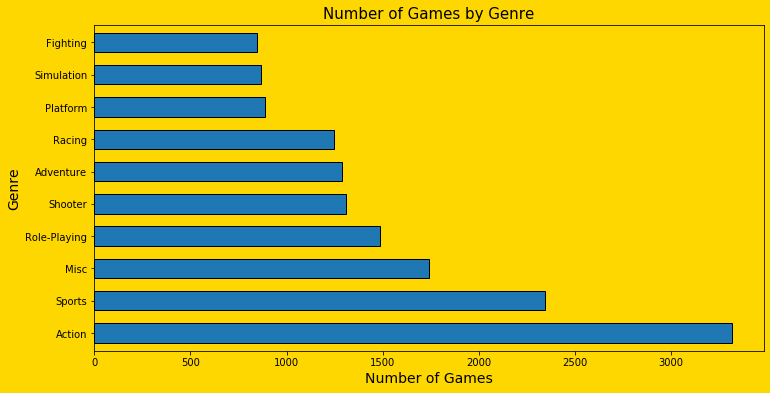

In [184]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_genres.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Number of Games by Genre', fontsize=15)
#plt.tight_layout()
plt.show()

In [23]:
df['Year'].value_counts().head(10)

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

In [24]:
top_10_year = df['Year'].value_counts().head(10)

In [25]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [26]:
top_genre_df = df.groupby(['Genre', 'Global_Sales']).sum().sort_values(by='Global_Sales', ascending=False)
top_genre_df

,,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,Global_Sales,,,,,,
Sports,82.74,1,2006,41.49,29.02,3.77,8.46
Platform,40.24,2,1985,29.08,3.58,6.81,0.77
Racing,35.82,3,2008,15.85,12.88,3.79,3.31
Sports,33.00,4,2009,15.75,11.01,3.28,2.96
Role-Playing,31.37,5,1996,11.27,8.89,10.22,1.00
Puzzle,30.26,6,1989,23.20,2.26,4.22,0.58
Platform,30.01,7,2006,11.38,9.23,6.50,2.90
Misc,29.02,8,2006,14.03,9.20,2.93,2.85
Platform,28.62,9,2009,14.59,7.06,4.70,2.26
